In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
job_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Placement Prediction Project/Placement_Data_Full_Class.csv")
job_data.head()

,SL_NO,Gender,Aptitude,Grammer,Branch,Code,Specialization,Internship,Logical,CGPA,Placement
0,1,M,77,91,CSE,58,AI,0,55,7.57,1
1,2,M,89,78,IT,77,AI,1,87,8.29,1
2,3,M,75,68,ECE,64,IOT,1,75,7.23,1
3,4,M,66,52,IT,52,Cloud,0,66,7.43,0
4,5,M,96,74,CSE,73,AI,0,97,6.94,1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
job_data.tail()

,SL_NO,Gender,Aptitude,Grammer,Branch,Code,Specialization,Internship,Logical,CGPA,Placement
210,211,M,91,82,CSE,78,AI,0,91,9.31,1
211,212,M,68,60,IT,72,AI,0,74,6.70,1
212,213,M,77,67,CSE,73,AI,1,59,8.72,1
213,214,F,84,66,CSE,58,AI,0,70,7.53,1
214,215,M,72,58,IT,53,AI,0,89,7.53,0


In [4]:
job_data.shape

(215, 11)

In [5]:
job_data['Branch'].unique()

array(['CSE', 'IT', 'ECE'], dtype=object)

In [6]:
job_data['Specialization'].unique()

array(['AI', 'IOT', 'Cloud'], dtype=object)

In [7]:
job_data.isnull().sum()

SL_NO             0
Gender            0
Aptitude          0
Grammer           0
Branch            0
Code              0
Specialization    0
Internship        0
Logical           0
CGPA              0
Placement         0
dtype: int64

# **Data Visualization**

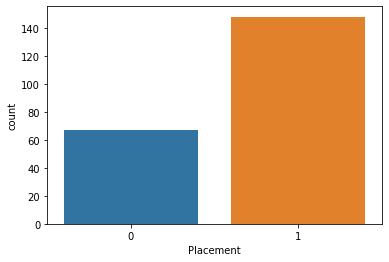

In [8]:
sns.countplot(x="Placement",data=job_data)

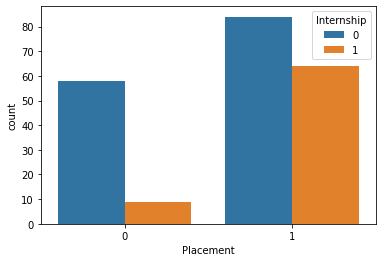

In [9]:
sns.countplot(x="Placement",hue="Internship",data=job_data)

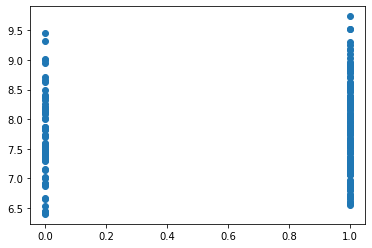

In [10]:
plt.scatter(job_data['Placement'],job_data['CGPA'])
plt.show()

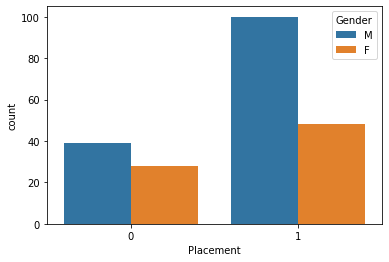

In [11]:
sns.countplot(x=job_data['Placement'],hue=job_data['Gender'])

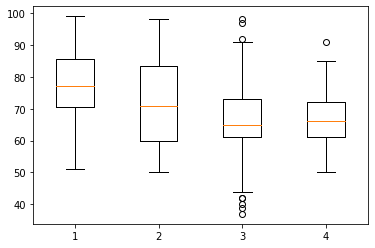

In [12]:
data = [job_data['Aptitude'],job_data['Logical'],job_data['Grammer'],job_data['Code']]
bp=plt.boxplot(data)
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
job_data['Branch'] = LabelEncoder().fit_transform(job_data['Branch'])
job_data['Specialization'] = LabelEncoder().fit_transform(job_data['Specialization'])
job_data['Gender'] = LabelEncoder().fit_transform(job_data['Gender'])
job_data.head()

,SL_NO,Gender,Aptitude,Grammer,Branch,Code,Specialization,Internship,Logical,CGPA,Placement
0,1,1,77,91,0,58,0,0,55,7.57,1
1,2,1,89,78,2,77,0,1,87,8.29,1
2,3,1,75,68,1,64,2,1,75,7.23,1
3,4,1,66,52,2,52,1,0,66,7.43,0
4,5,1,96,74,0,73,0,0,97,6.94,1


In [15]:
job_data['Branch'].unique()

array([0, 2, 1])

In [16]:
job_data['Placement'].corr(job_data['Branch'])

-0.015349532995723156

In [17]:
job_data['Placement'].corr(job_data['Gender'])

0.09067039775423338

In [18]:
job_data['Placement'].corr(job_data['Specialization'])

-0.04553769360040786

In [20]:
features = ['Aptitude','Grammer','Code','Logical','CGPA','Internship']
X = job_data[features]
y = job_data["Placement"]

In [21]:
#X.shape
y.shape

(215,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1) 

In [24]:
X_test.shape

(65, 6)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
p = model.predict(X_test)

In [27]:
print(p)

[1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0]


In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.89      0.93      0.91        45

    accuracy                           0.88        65
   macro avg       0.86      0.84      0.85        65
weighted avg       0.88      0.88      0.88        65



In [30]:
confusion_matrix(y_test,p)

array([[15,  5],
       [ 3, 42]])

**Accuracy of Logistic Regression Model**

In [31]:
c = accuracy_score(y_test,p)*100
print(c)

87.6923076923077


In [36]:
import joblib

In [37]:
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/Placement Prediction Project/LRmodel.joblib')

['/content/drive/MyDrive/Colab Notebooks/Placement Prediction Project/LRmodel.joblib']

In [ ]:
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

**Accuracy of Decision Tree Classifier Model**

In [ ]:
print("Accuracy_score is :",accuracy_score(y_test,y_pred)*100)

Accuracy_score is : 76.92307692307693


In [ ]:
y_pred[0:]

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
tree_pred1=clf.predict([[90,90,90,1,85,9.02]])
tree_pred1

array([1])

In [ ]:
tree_pred2 = clf.predict([[55,51,68,0,60,7.1]])
tree_pred2

array([0])

In [ ]:
#ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 

In [ ]:
a = Sequential()

In [ ]:
a.add(Dense(11,kernel_initializer='random_uniform',activation='relu'))

In [ ]:
a.add(Dense(22,kernel_initializer='random_uniform',activation='relu'))

In [ ]:
a.add(Dense(1,kernel_initializer='random_uniform',activation='sigmoid'))

In [ ]:
a.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

**Accuracy of ANN Model**

In [ ]:
a.fit(X_train,y_train,epochs=10,batch_size=32,steps_per_epoch=5)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7533
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.7267
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7400
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7600
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.7600
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7400
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7600
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4927 - accuracy: 0.7667
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7467
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.7733


In [ ]:
y_pred = a.predict(X_test)

In [ ]:
y_pred = y_pred[y_pred>0.5]

In [ ]:
y_pred

array([0.5514992 , 0.84340894, 0.56260204, 0.81262577, 0.5640989 ,
       0.686514  , 0.5914472 , 0.72566223, 0.69898367, 0.60395384,
       0.6960249 , 0.51377714, 0.84002924, 0.61644864, 0.71266395,
       0.73649466, 0.86379147, 0.64359117, 0.527578  , 0.8621963 ,
       0.6717511 , 0.7862455 , 0.7518728 , 0.58360904, 0.6211828 ,
       0.79022443, 0.934973  , 0.63643223, 0.6813802 , 0.64065063,
       0.8167187 , 0.6387988 , 0.92525125, 0.95122635, 0.86859274,
       0.7889732 , 0.5100433 , 0.6334668 , 0.65673816, 0.80550337,
       0.6815214 , 0.73461014, 0.8734413 , 0.635336  , 0.5905334 ,
       0.882839  , 0.81620276, 0.7342201 , 0.7805418 , 0.7679144 ,
       0.9004398 , 0.80731124, 0.6909565 , 0.82160926, 0.83752954,
       0.50961643, 0.74309415, 0.55842024], dtype=float32)

In [ ]:
data=pd.DataFrame([90,90,90,1,85,9.02]).transpose()
data.columns=['Aptitude','Grammer','Code','Logical','CGPA','Internship']

new_pred = a.predict(data)

In [ ]:
new_pred>0.5

array([[ True]])

In [ ]:
ano_pred = a.predict([[89,75,78,1,80,8.67]])
ano_pred

array([[0.63746977]], dtype=float32)